In [5]:
import os
import sys

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import seaborn as sns


sys.path.append(os.path.abspath("../src"))
from utils import (
    load_flores_dataset,
)

In [6]:
TOKENIZER_MODELS = ["BPE", "WordPiece", "Unigram"]
#VOCAB_SIZES = [10000, 20000, 30000, 4000]
VOCAB_SIZES = [40000]
LANGUAGES = ["es", "tr"]
EVAL_DATASETS = ["flores", "massive"]



results_path = "../results/"

### Fertility

Dataset: FLORES


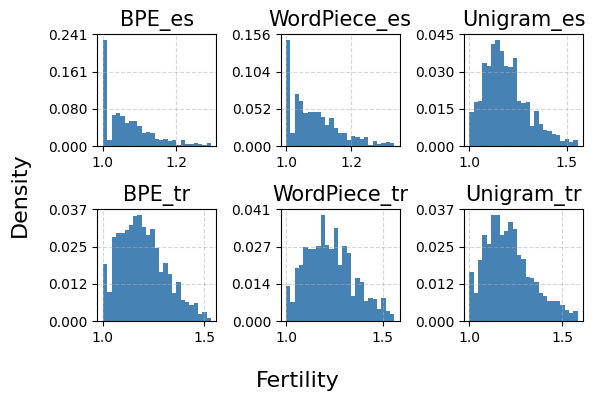

Dataset: MASSIVE


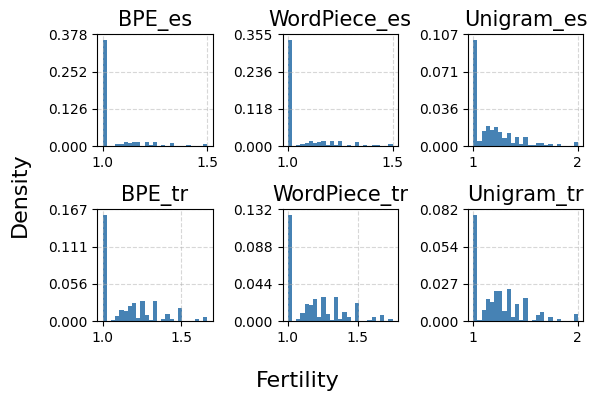

In [9]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    
    fig, axes = plt.subplots(2, 3, figsize=(6, 4))  
    for i, language in enumerate(LANGUAGES):
        for j, model_name in enumerate(TOKENIZER_MODELS):
            results_fertility_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/eval_metrics_{dataset_name}.json')
            with open(results_fertility_path) as f:
                results_dict = json.load(f)

            # Plot a histogram with proportions
            axes[i][j].hist(results_dict['fertility'], bins=25, range=(min(results_dict['fertility']), np.percentile(results_dict['fertility'], 97.5)), density=True, color='steelblue')
            axes[i][j].set_title(f"{model_name}_{language}", fontsize=15)
            axes[i][j].grid(True, linestyle='--', alpha=0.5)
            
            
            y_min, y_max = axes[i][j].get_ylim()  # Get the current y-axis limits
            y_ticks = np.linspace(y_min, y_max, 4)  # Generate 4 evenly spaced ticks
            axes[i][j].set_yticks(y_ticks)  # Set the ticks
            axes[i][j].set_yticklabels([f'{tick/100:.3f}' for tick in y_ticks])  # Format the tick labels  

            # Add shared x and y-axis labels
            fig.supxlabel('Fertility', fontsize=16)
            fig.supylabel('Density', fontsize=16)

    plt.tight_layout()
    # Save the figure as an SVG file
    #plt.savefig('../figures/fertility_{dataset_name}.svg')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

### Parity

Dataset: FLORES
BPE gave the highest parity of 2.36 with index 1820
WordPiece gave the highest parity of 2.42 with index 963
Unigram gave the highest parity of 3.43 with index 236


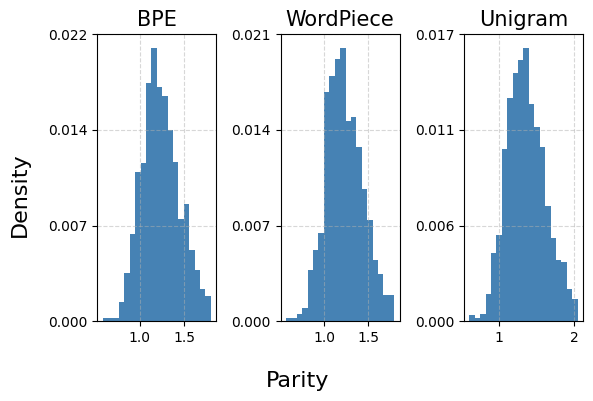

Dataset: MASSIVE
BPE gave the highest parity of 4.00 with index 6876
WordPiece gave the highest parity of 4.00 with index 6876
Unigram gave the highest parity of 7.00 with index 15083


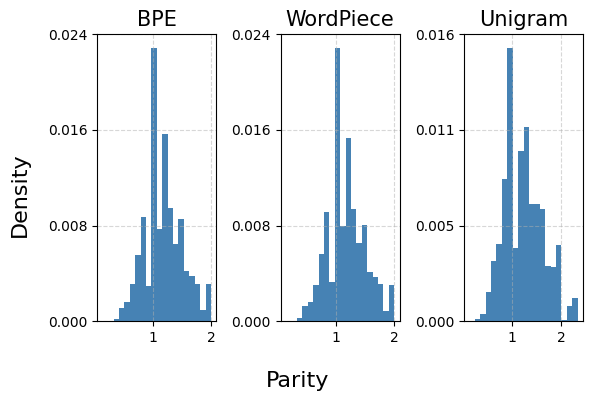

In [11]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    
    fig, axes = plt.subplots(1, 3, figsize=(6, 4))  
    axes = axes.flatten()
    for i, model_name in enumerate(TOKENIZER_MODELS):
        results_parity_path = os.path.join(results_path, f'tr_{model_name}_vs40000/parity_{dataset_name}.json')
        with open(results_parity_path) as f:
            results_dict = json.load(f)

        # To keep track of a data point that gives the highest parity
        max_parity = max(results_dict['parity'])
        idx = np.argmax(results_dict['parity'])
        print(f'{model_name} gave the highest parity of {max_parity:.2f} with index {idx}')

        # Plot a histogram with proportions
        axes[i].hist(results_dict['parity'], bins=20, range=(min(results_dict['parity']), np.percentile(results_dict['parity'], 97.5)), density=True, color='steelblue')
        axes[i].set_title(f"{model_name}", fontsize=15)
        axes[i].grid(True, linestyle='--', alpha=0.5)
        
        
        y_min, y_max = axes[i].get_ylim()  # Get the current y-axis limits
        y_ticks = np.linspace(y_min, y_max, 4)  # Generate 4 evenly spaced ticks
        axes[i].set_yticks(y_ticks)  # Set the ticks
        axes[i].set_yticklabels([f'{tick/100:.3f}' for tick in y_ticks])  # Format the tick labels  

        # Add shared x and y-axis labels
        fig.supxlabel('Parity', fontsize=16)
        fig.supylabel('Density', fontsize=16)

    plt.tight_layout()
    # Save the figure as an SVG file
    #plt.savefig('../figures/parity_{dataset_name}.svg')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
        

In [12]:
flores_es = load_flores_dataset('es')
flores_tr = load_flores_dataset('tr')

text_es = flores_es['text'][236]
text_tr = flores_tr['text'][236]

print('\n')
print(f'Spanish text: {text_es}')
print(f'Turkish text: {text_tr}')

Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).
Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).




Spanish text: se comportará igual que el agua. es transparente, tal como lo es el agua.
Turkish text: suya benzer şekilde saydam davranış sergileyecek.


### Productivity

Dataset: FLORES


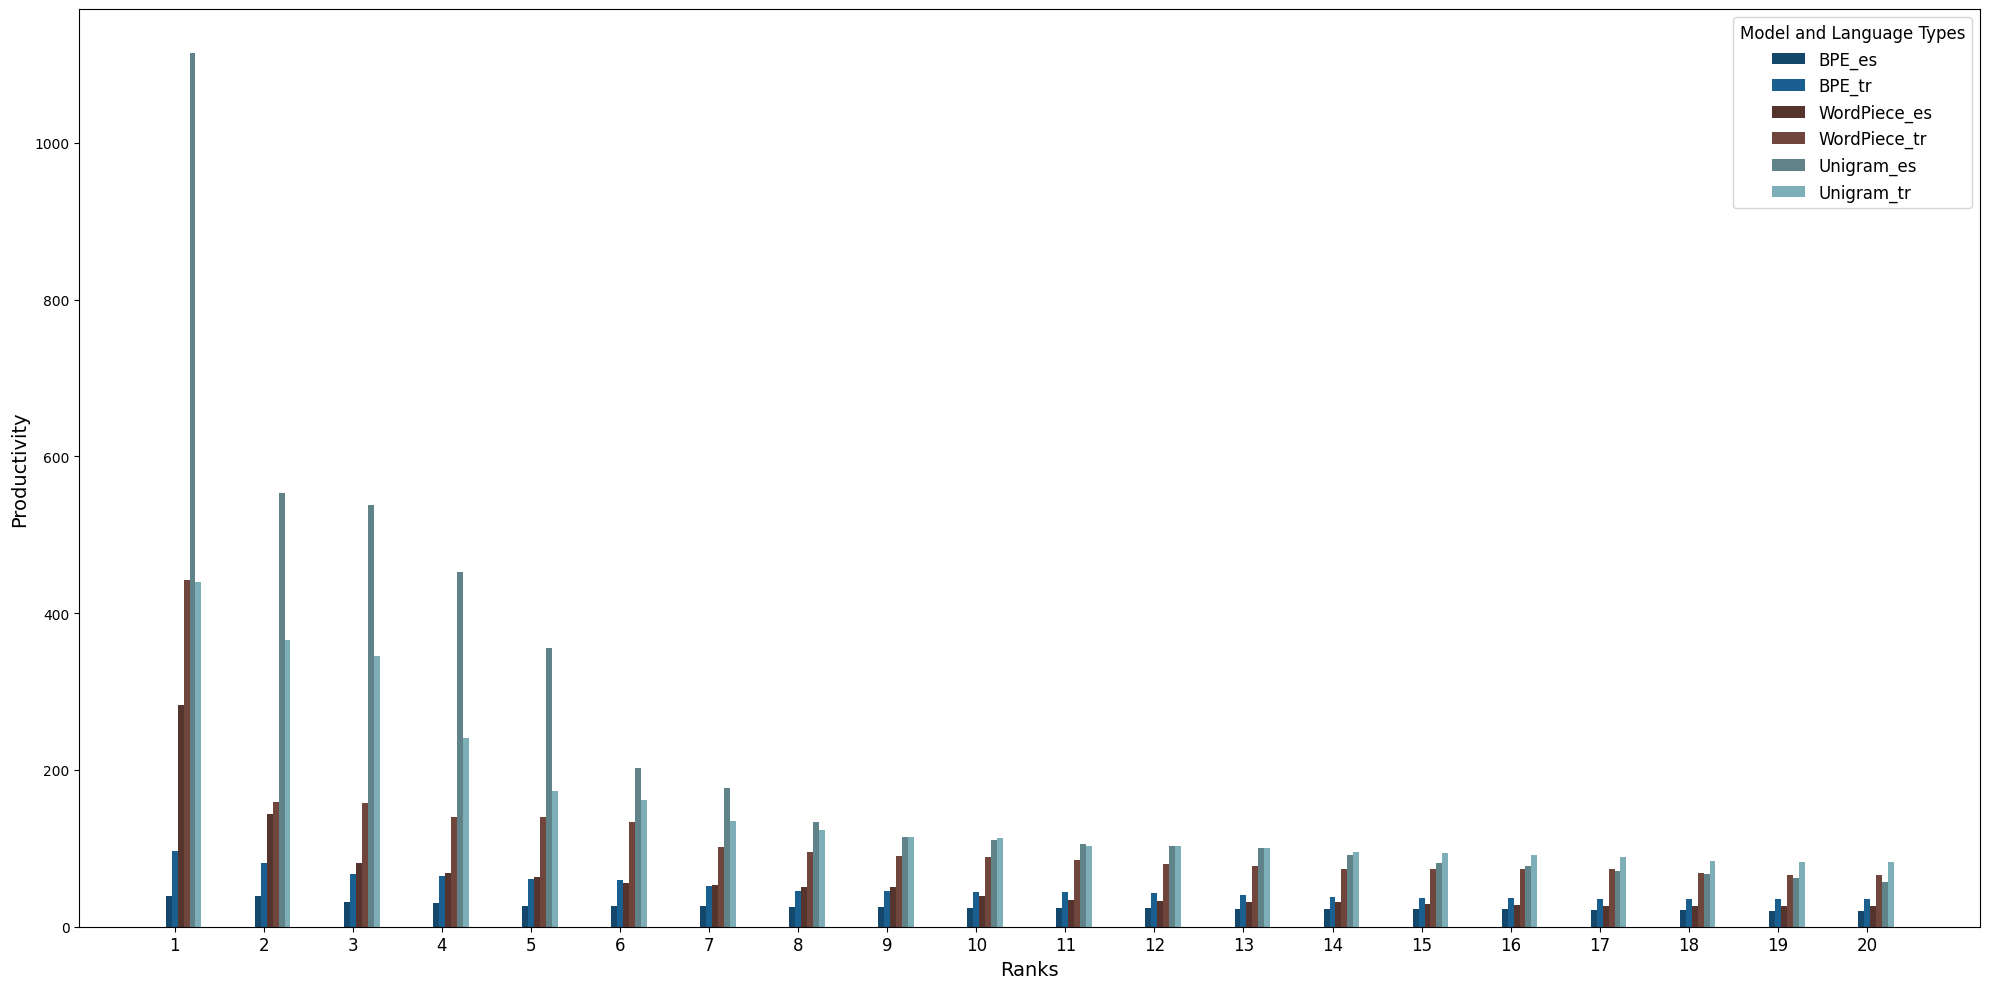

Dataset: MASSIVE


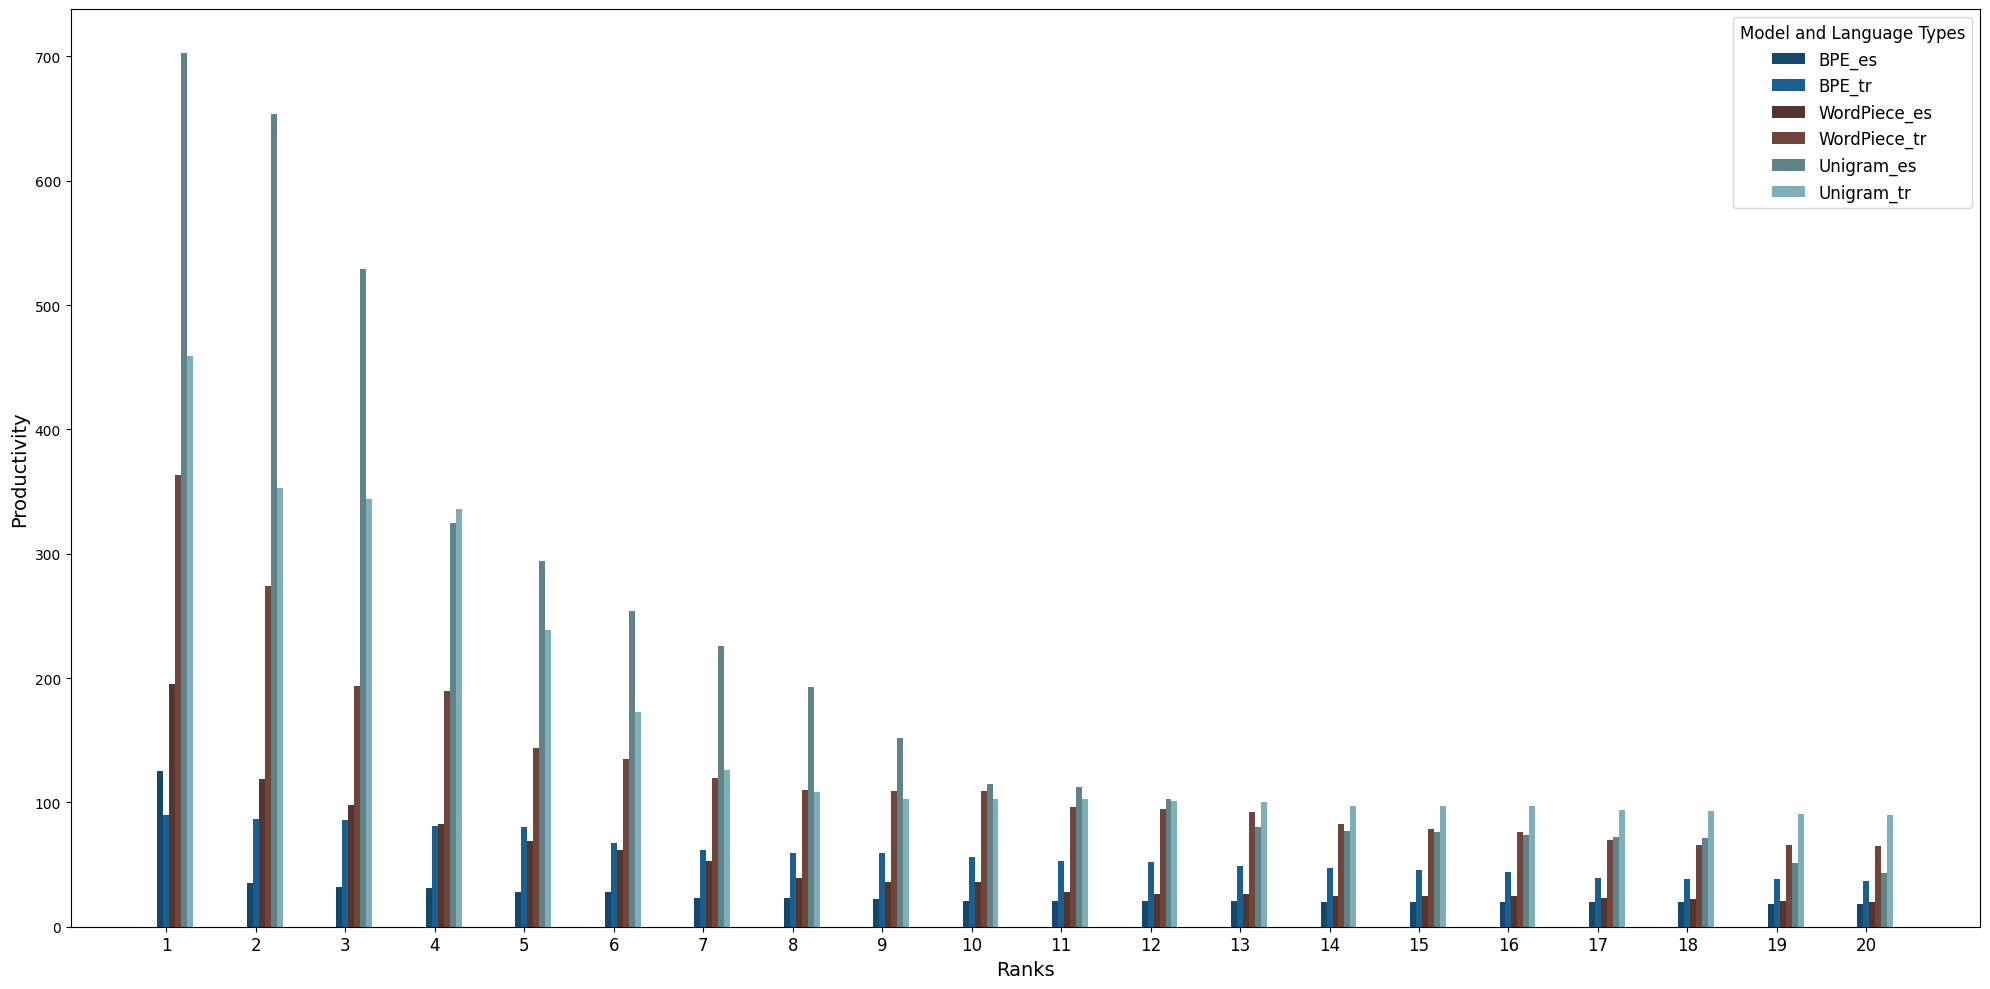

In [15]:
language_shades = {'tr': 0.8, 'es': 0.6}
colors = plt.cm.tab20(np.linspace(0, 1, len(TOKENIZER_MODELS)))
model_colors = {model_name: color for model_name, color in zip(TOKENIZER_MODELS, colors)}

color_dict = {}
for model_name in TOKENIZER_MODELS:
    for language in LANGUAGES:
        shade = language_shades[language]
        color = mcolors.to_rgb(model_colors[model_name])
        adjusted_color = tuple([c * shade for c in color])

        color_dict[(language, model_name)] = adjusted_color

ranks = np.arange(1, 21)  # Rankings from 1 to 20
bar_width = 0.2 / len(TOKENIZER_MODELS)

for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(20, 10))
    for i, (language, model_name) in enumerate(color_dict.keys()):
        results_productivity_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/productivity_{dataset_name}.json')
        with open(results_productivity_path) as f:
            results_dict = json.load(f)
        
        top20_values = sorted(results_dict.values(), reverse=True)[:20]

        plt.bar(ranks + i * bar_width, top20_values, width=bar_width, 
            label=f'{model_name}_{language}', color=color_dict[(language, model_name)])

    plt.xlabel('Ranks', fontsize=14)
    plt.ylabel('Productivity', fontsize=14)

    plt.xticks(ranks + bar_width * (len(TOKENIZER_MODELS) - 1) / 2, ranks, fontsize=12)

    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]

    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper right', fontsize=12, title_fontsize=12)

    plt.tight_layout()
    plt.show()

### Morpheme-level F1

Model: BPE
F1 0.5-0.6: 72
F1 0.6-0.7: 180
F1 0.7-0.8: 1223
F1 0.8-0.9: 2107
F1 0.9-1.0: 871
F1 < 0.5: 4453
Model: WordPiece
F1 0.5-0.6: 79
F1 0.6-0.7: 245
F1 0.7-0.8: 1485
F1 0.8-0.9: 1902
F1 0.9-1.0: 733
F1 < 0.5: 4444
Model: Unigram
F1 0.5-0.6: 79
F1 0.6-0.7: 266
F1 0.7-0.8: 1531
F1 0.8-0.9: 1889
F1 0.9-1.0: 683
F1 < 0.5: 4448


/var/folders/tj/hl1lt9gs7437b5wxt0r22tfc0000gn/T/ipykernel_47813/1215443583.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis').reversed()


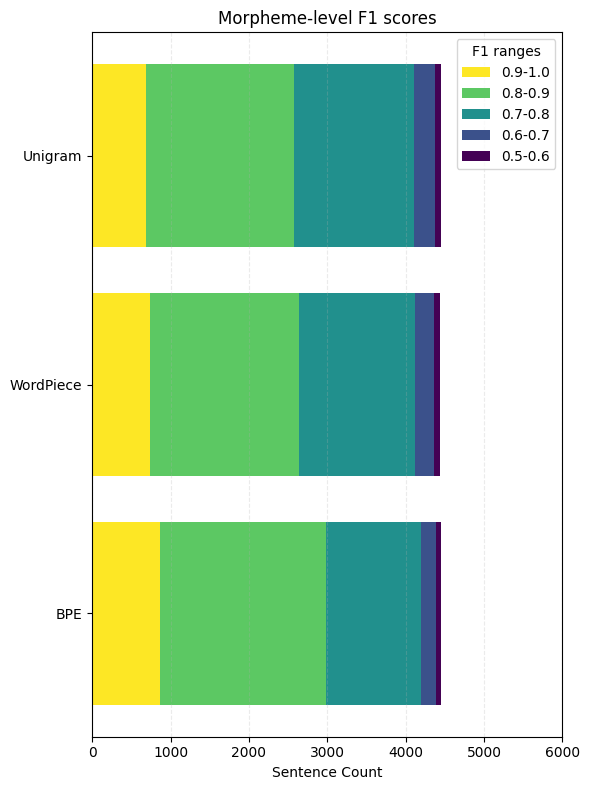

In [16]:
# Create a colormap
cmap = cm.get_cmap('viridis').reversed()
colors = cmap(np.linspace(0, 1, 5)) 


fig, ax = plt.subplots(1, 1, figsize=(6, 8))

f1_score_05 = []
f1_score_06 = []
f1_score_07 = []
f1_score_08 = []
f1_score_09 = []
f1_score_05_higher = []

for model_name in TOKENIZER_MODELS:
    # Load the f1 results
    results_f1_path = os.path.join(results_path, f'tr_{model_name}_vs40000/f1_score.json')
    with open(results_f1_path) as f:
        results_dict = json.load(f)
    
    f1_05 = 0
    f1_06 = 0
    f1_07 = 0
    f1_08 = 0
    f1_09 = 0

    for f1_score in results_dict['f1_score']:
        if f1_score > 0.9:
            f1_09 += 1
        elif f1_score > 0.8:
            f1_08 += 1
        elif f1_score > 0.7:
            f1_07 += 1
        elif f1_score > 0.6:
            f1_06 += 1
        elif f1_score > 0.5:
            f1_05 += 1

    f1_05_higher= np.sum([f1_05, f1_06, f1_07, f1_08, f1_09], axis=0)

    f1_score_05.append(f1_05)
    f1_score_06.append(f1_06)
    f1_score_07.append(f1_07)
    f1_score_08.append(f1_08)
    f1_score_09.append(f1_09)
    f1_score_05_higher.append(f1_05_higher)

    

    print(f"Model: {model_name}")
    print("F1 0.5-0.6:", f1_05)
    print("F1 0.6-0.7:", f1_06)
    print("F1 0.7-0.8:", f1_07)
    print("F1 0.8-0.9:", f1_08)
    print("F1 0.9-1.0:", f1_09)
    print("F1 < 0.5:", f1_05_higher)

x_positions = np.arange(len(TOKENIZER_MODELS))

# Plot a stacked bar graph in the current subplot
ax.barh(x_positions, f1_score_09, color=colors[0], label='0.9-1.0')
ax.barh(x_positions, f1_score_08, left=f1_score_09, color=colors[1], label='0.8-0.9')
ax.barh(x_positions, f1_score_07, left=np.add(f1_score_09, f1_score_08), color=colors[2], label='0.7-0.8')
ax.barh(x_positions, f1_score_06, left=np.add(np.add(f1_score_09, f1_score_08), f1_score_07), color=colors[3], label='0.6-0.7')
ax.barh(x_positions, f1_score_05, left=np.add(np.add(np.add(f1_score_09, f1_score_08), f1_score_07), f1_score_06), color=colors[4], label='0.5-0.6')

# Add the labels and title
ax.set_yticks(x_positions)
ax.set_yticklabels(TOKENIZER_MODELS)
ax.set_xlabel('Sentence Count')
ax.set_title('Morpheme-level F1 scores')

# Add gridlines and set x-ticks every 10
ax.grid(True, axis='x', linestyle='--', alpha=0.25)  # Gridlines only on the x-axis
max_f1_total = max(f1_score_05_higher)  # Calculate the maximum value for the x-ticks
ax.set_xticks(np.arange(0, max_f1_total + 2000, 1000))  # Set x-ticks every 10

# Add legend for only the first plot
ax.legend(title='F1 ranges')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure with subplots
#plt.savefig('../figures/f1_scores.svg', bbox_inches='tight')

# Show the figure
plt.show()